In [1]:
import yfinance as yf
from datetime import datetime
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
msft = yf.Ticker("MSFT")

In [3]:
# get stock info
#print(msft.info)
msft_dict = msft.info
#msft_dict

In [4]:
print('symbol:',msft_dict['symbol'])
print('longName:',msft_dict['longName'])
print('sector:',msft_dict['sector'])
print('twoHundredDayAverage:',msft_dict['twoHundredDayAverage'])
print('marketCap:',msft_dict['marketCap'])
print('regularMarketPrice:',msft_dict['regularMarketPrice'])
#print('bookValue:',msft_dict['bookValue'])
print('bid:',msft_dict['bid'])

symbol: MSFT
longName: Microsoft Corporation
sector: Technology
twoHundredDayAverage: 173.40393
marketCap: 1579251400704
regularMarketPrice: 210.45
bid: 209.75


# Downoad Historical Data

### List of Q500US Tickers from Quatopian

In [2]:
# The following code was used on Quantopian to get 500 tickers

#from quantopian.pipeline import Pipeline
#from quantopian.research import run_pipeline
#from quantopian.pipeline import Pipeline
#from quantopian.pipeline.data.builtin import USEquityPricing
#from quantopian.pipeline.factors import AverageDollarVolume,SimpleMovingAverage
#from quantopian.pipeline.filters.morningstar import Q1500US
#from quantopian.pipeline.filters.morningstar import Q500US
#from quantopian.pipeline.data import morningstar

In [3]:
#def make_pipeline():
#    return Pipeline(screen=Q500US())

In [4]:
##result = run_pipeline(make_pipeline(), '2020-01-01', '2020-01-01') # --> Jan 01
#result = run_pipeline(make_pipeline(), '2020-02-11', '2020-02-11') # --> Feb 11
#result.head()

In [5]:
#ticker_symbols = []
#for i in range(result.shape[0]):
#    ticker_symbols.append(result.index[i][1].symbol)
#
#ticker_symbols

In [6]:
tickers_list = ['AAPL',
 'ABMD',
 'ABT',
 'ADSK',
 'ADBE',
 'ADI',
 'ADM',
 'AEP',
 'AES',
 'AFL',
 'HES',
 'AIG',
 'AMAT',
 'AMD',
 'AMGN',
 'AON',
 'APA',
 'APD',
 'APH',
 'ADP',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBY',
 'BDX',
 'BEN',
 'BK',
 'BLL',
 'BMY',
 'BSX',
 'CAG',
 'CAT',
 'C',
 'CAH',
 'CDNS',
 'CERN',
 'CHD',
 'CI',
 'CL',
 'CLF',
 'CLX',
 'CMA',
 'CMCS_A',
 'CMS',
 'COG',
 'COST',
 'CPB',
 'CSCO',
 'CSX',
 'CTAS',
 'CTL',
 'CMI',
 'CY',
 'D',
 'DE',
 'DHR',
 'DIS',
 'DHI',
 'DTE',
 'DUK',
 'DVN',
 'ECL',
 'ED',
 'EFX',
 'EMR',
 'EOG',
 'EA',
 'ETN',
 'ETR',
 'F',
 'FAST',
 'M',
 'FDX',
 'FISV',
 'FITB',
 'S',
 'NEE',
 'GD',
 'GE',
 'GILD',
 'GIS',
 'GLW',
 'GPS',
 'GWW',
 'HAL',
 'MNST',
 'HAS',
 'HBAN',
 'WELL',
 'PEAK',
 'HD',
 'HOLX',
 'HRL',
 'LHX',
 'HSY',
 'HUM',
 'HPQ',
 'IBM',
 'BIIB',
 'IFF',
 'INTC',
 'IP',
 'TT',
 'ITW',
 'JBHT',
 'JNJ',
 'K',
 'KEY',
 'KLAC',
 'KMB',
 'KO',
 'KR',
 'KSS',
 'KSU',
 'LEN',
 'LLY',
 'LOW',
 'LRCX',
 'LB',
 'LUV',
 'MAS',
 'MKC',
 'MCD',
 'MDT',
 'CVS',
 'MGM',
 'SPGI',
 'MMC',
 'MMM',
 'MO',
 'MHK',
 'MSI',
 'MRK',
 'MRO',
 'MSFT',
 'MU',
 'MXIM',
 'MYL',
 'NBL',
 'NEM',
 'NI',
 'NKE',
 'JWN',
 'NOC',
 'NSC',
 'NTRS',
 'ES',
 'NUE',
 'OKE',
 'OMC',
 'ORCL',
 'OXY',
 'PAYX',
 'PCAR',
 'PCG',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PGR',
 'PH',
 'PHM',
 'PNC',
 'PPG',
 'PPL',
 'PVH',
 'QCOM',
 'REGN',
 'ROK',
 'ROP',
 'ROST',
 'RTN',
 'T',
 'SBUX',
 'SCHW',
 'SHW',
 'SLB',
 'SNPS',
 'SO',
 'TRV',
 'STT',
 'SYK',
 'SWK',
 'NLOK',
 'SYY',
 'TER',
 'TIF',
 'TJX',
 'TMO',
 'TROW',
 'TXN',
 'JCI',
 'TSN',
 'UNH',
 'UNP',
 'RTX',
 'VFC',
 'VIAC',
 'VLO',
 'VMC',
 'VRTX',
 'WBA',
 'WDC',
 'WEC',
 'WFC',
 'WHR',
 'WMB',
 'WMT',
 'WY',
 'X',
 'XLNX',
 'XOM',
 'FL',
 'ZBRA',
 'ZION',
 'CHK',
 'AGN',
 'CB',
 'INTU',
 'MCHP',
 'ORLY',
 'RCL',
 'RIG',
 'EQR',
 'ATVI',
 'HST',
 'INCY',
 'SPG',
 'MLM',
 'TSCO',
 'ALB',
 'CPRT',
 'AEO',
 'BRK_B',
 'SIRI',
 'O',
 'COF',
 'MCK',
 'DLTR',
 'LMT',
 'DRI',
 'LH',
 'WAB',
 'FCX',
 'EL',
 'NTAP',
 'WAT',
 'CTXS',
 'HIG',
 'ALXN',
 'EIX',
 'OLED',
 'CHKP',
 'ETFC',
 'CIEN',
 'KMX',
 'AMTD',
 'IVZ',
 'TTWO',
 'AMZN',
 'TFC',
 'SRPT',
 'MS',
 'PXD',
 'CHRW',
 'NLY',
 'YUM',
 'FE',
 'MTD',
 'URI',
 'VTR',
 'AVB',
 'CTSH',
 'WM',
 'CCI',
 'NVDA',
 'BKNG',
 'GS',
 'JNPR',
 'SBAC',
 'BMRN',
 'CSGP',
 'AKAM',
 'BLK',
 'WWE',
 'UPS',
 'TGT',
 'EW',
 'MET',
 'ON',
 'MRVL',
 'ILMN',
 'VZ',
 'XEL',
 'LNG',
 'TPR',
 'DVA',
 'EXC',
 'MCO',
 'ALGN',
 'EXAS',
 'GPN',
 'ADS',
 'MDLZ',
 'FIS',
 'ABC',
 'ZBH',
 'ANTM',
 'CVX',
 'AAP',
 'CNC',
 'PRU',
 'JBLU',
 'NFLX',
 'SWKS',
 'COP',
 'CNP',
 'DKS',
 'WYNN',
 'XEC',
 'CME',
 'EQIX',
 'STX',
 'CCL',
 'A',
 'AMT',
 'SRE',
 'AEE',
 'PLD',
 'NOV',
 'EBAY',
 'RL',
 'ALL',
 'STZ',
 'PSA',
 'JPM',
 'USB',
 'HON',
 'ISRG',
 'ACN',
 'MAR',
 'NRG',
 'CRM',
 'DPZ',
 'IAC',
 'GOOG_L',
 'DLR',
 'MKTX',
 'LVS',
 'DXCM',
 'MPW',
 'EXPE',
 'CF',
 'AMP',
 'ICE',
 'UAA',
 'CMG',
 'UAL',
 'TDG',
 'MA',
 'HBI',
 'WU',
 'TMUS',
 'DAL',
 'CLR',
 'PODD',
 'DFS',
 'TEL',
 'BX',
 'LULU',
 'CXO',
 'MELI',
 'VMW',
 'RF',
 'ULTA',
 'MSCI',
 'PM',
 'V',
 'AWK',
 'AGNC',
 'DISC_A',
 'AVGO',
 'VRSK',
 'DG',
 'FTNT',
 'CHTR',
 'SSNC',
 'LYB',
 'TSLA',
 'KKR',
 'NXPI',
 'GM',
 'FRC',
 'FLT',
 'WMGI',
 'KMI',
 'HCA',
 'MOS',
 'YNDX',
 'MPC',
 'VER',
 'APTV',
 'WPX',
 'CPRI',
 'ZNGA',
 'CZR',
 'ENPH',
 'PSX',
 'SPLK',
 'FB',
 'NOW',
 'FIVE',
 'PANW',
 'WDAY',
 'FANG',
 'RH',
 'ABBV',
 'NCLH',
 'ZTS',
 'IQV',
 'CDW',
 'RNG',
 'BURL',
 'VEEV',
 'TWTR',
 'TNDM',
 'AAL',
 'ARMK',
 'HLT',
 'ALLY',
 'GRUB',
 'PAYC',
 'ZEN',
 'PE',
 'ANET',
 'INFO',
 'SYF',
 'CFG',
 'CYBR',
 'W',
 'ZAYO',
 'KEYS',
 'QRVO',
 'SHAK',
 'GDDY',
 'ETSY',
 'TDOC',
 'KHC',
 'PYPL',
 'LITE',
 'HPE',
 'MTCH',
 'SQ',
 'TEAM',
 'FTV',
 'TWLO',
 'TTD',
 'NTNX',
 'COUP',
 'YUMC',
 'AA',
 'INVH',
 'SNAP',
 'DXC',
 'AYX',
 'OKTA',
 'CVNA',
 'VST',
 'ATUS',
 'BKR',
 'DD',
 'ROKU',
 'MDB',
 'PAGS',
 'VICI',
 'ZS',
 'DBX',
 'SPOT',
 'DOCU',
 'EVRG',
 'ELAN',
 'GH',
 'ESTC',
 'PLAN',
 'STNE',
 'LIN',
 'DELL',
 'FOXA',
 'DOW',
 'LYFT',
 'PINS',
 'ZM',
 'BYND',
 'UBER',
 'CTVA',
 'CRWD',
 'WORK']

In [7]:
# Change Ticker Format to Mathch Yahoo Finance Format
tickers_list[tickers_list.index('BRK_B')] = 'BRKB' # --> Berkshire Hathaway Inc. Class B
tickers_list[tickers_list.index('DISC_A')] = 'DISCA' # --> DISCOVERY COMMUNICATIONS INC.
tickers_list[tickers_list.index('CMCS_A')] = 'CMCSA' # --> Comcast Corporation
tickers_list[tickers_list.index('GOOG_L')] = 'GOOGL' # --> Alphabet Inc Class A
print('done replacing tickers.')

done replacing tickers.


In [8]:
len(tickers_list)

500

In [9]:
tickers = ''
for i in tickers_list:
    tickers += i + ' '
    
tickers = tickers[:-1]
tickers

'AAPL ABMD ABT ADSK ADBE ADI ADM AEP AES AFL HES AIG AMAT AMD AMGN AON APA APD APH ADP AXP AZO BA BAC BAX BBBY BBY BDX BEN BK BLL BMY BSX CAG CAT C CAH CDNS CERN CHD CI CL CLF CLX CMA CMCSA CMS COG COST CPB CSCO CSX CTAS CTL CMI CY D DE DHR DIS DHI DTE DUK DVN ECL ED EFX EMR EOG EA ETN ETR F FAST M FDX FISV FITB S NEE GD GE GILD GIS GLW GPS GWW HAL MNST HAS HBAN WELL PEAK HD HOLX HRL LHX HSY HUM HPQ IBM BIIB IFF INTC IP TT ITW JBHT JNJ K KEY KLAC KMB KO KR KSS KSU LEN LLY LOW LRCX LB LUV MAS MKC MCD MDT CVS MGM SPGI MMC MMM MO MHK MSI MRK MRO MSFT MU MXIM MYL NBL NEM NI NKE JWN NOC NSC NTRS ES NUE OKE OMC ORCL OXY PAYX PCAR PCG PEG PEP PFE PG PGR PH PHM PNC PPG PPL PVH QCOM REGN ROK ROP ROST RTN T SBUX SCHW SHW SLB SNPS SO TRV STT SYK SWK NLOK SYY TER TIF TJX TMO TROW TXN JCI TSN UNH UNP RTX VFC VIAC VLO VMC VRTX WBA WDC WEC WFC WHR WMB WMT WY X XLNX XOM FL ZBRA ZION CHK AGN CB INTU MCHP ORLY RCL RIG EQR ATVI HST INCY SPG MLM TSCO ALB CPRT AEO BRKB SIRI O COF MCK DLTR LMT DRI LH WAB FC

In [10]:
#tickers = "SPY AAPL MSFT"
#tickers_list = tickers.split()

In [11]:
period = "10y"
interval = "1mo"

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = period,

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = interval,

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        #auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        #prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        #threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        #proxy = None
    )

[*********************100%***********************]  500 of 500 completed


In [12]:
#drop all NaN rows
data = data.dropna(axis=0, how='all')
data.head()

CAH                                                          \
            Adj Close      Close       High        Low       Open      Volume   
Date                                                                            
2010-07-01        NaN        NaN        NaN        NaN        NaN         NaN   
2010-08-01  22.842695  29.959999  33.509998  29.690001  32.630001  70671900.0   
2010-09-01  25.191015  33.040001  33.549999  30.299999  30.299999  52095000.0   
2010-10-01  26.605301  34.689999  34.910000  31.830000  33.279999  70021200.0   
2010-11-01  27.287870  35.580002  36.790001  34.099998  34.939999  57388500.0   

              CPRT                          ...        NSC             \
              Open    High     Low   Close  ...       High        Low   
Date                                        ...                         
2010-07-01     NaN     NaN     NaN     NaN  ...        NaN        NaN   
2010-08-01  9.1625  9.1625  8.1075  8.2625  ...  58.000000  51.529999   
2010-09-01  8.3550  9.1825  7.8200  8.2425  ...  60.799999  54.250000   
2010-10-01  8.2825  8.6425  8.1325  8.4650  ...  63.180000  57.910000   
2010-11-01  8.4650  9.0575  8.4375  8.8700  ...  63.639999  59.200001   

                                         GIS                                   \
                 Open      Volume       Open       High        Low      Close   
Date                                                                            
2010-07-01        NaN         NaN        NaN        NaN        NaN        NaN   
2010-08-01  57.330002  54918100.0  35.029999  36.200001  33.110001  36.160000   
2010-09-01  54.340000  54594200.0  36.410000  37.430000  35.520000  36.540001   
2010-10-01  59.090000  57577300.0  36.860001  37.700001  36.450001  37.560001   
2010-11-01  61.919998  47997900.0  37.700001  37.700001  34.820000  35.330002   

                                    
            Adj Close       Volume  
Date                                
2010-07-01        NaN          NaN  
2010-08-01  25.871687  122674800.0  
2010-09-01  26.143576  106456500.0  
2010-10-01  26.873354   75496900.0  
2010-11-01  25.469440   96009500.0  

[5 rows x 3000 columns]

In [13]:
data.shape

(122, 3000)

# Save Dowloaded Historical Data to .csv Files

In [14]:
# save data in csv files
for tick in data.columns.levels[0]:
    data[tick].to_csv('historical_data/{:s}_{:s}_{:s}.csv'.format(tick, interval, period))
    print(tick, 'saved.')
print('done.')

CAH saved.
CPRT saved.
DPZ saved.
NXPI saved.
CPRI saved.
PXD saved.
CVX saved.
ETSY saved.
MO saved.
CTVA saved.
WFC saved.
ABC saved.
CNP saved.
FCX saved.
CMCSA saved.
RCL saved.
DOCU saved.
LH saved.
BAX saved.
HLT saved.
BEN saved.
TFC saved.
OKE saved.
LUV saved.
PH saved.
ILMN saved.
TDOC saved.
SRPT saved.
MCO saved.
DLTR saved.
CDNS saved.
EXC saved.
CSCO saved.
BBY saved.
LOW saved.
BIIB saved.
TPR saved.
CXO saved.
PINS saved.
WEC saved.
KSS saved.
DOW saved.
MSFT saved.
EVRG saved.
CI saved.
PEG saved.
CY saved.
FTNT saved.
NUE saved.
BKR saved.
VER saved.
JNPR saved.
JCI saved.
TIF saved.
FITB saved.
ZEN saved.
ZION saved.
XEL saved.
ROKU saved.
FISV saved.
CMG saved.
BA saved.
QRVO saved.
NOC saved.
ZAYO saved.
TEAM saved.
UNH saved.
ARMK saved.
ALB saved.
SPLK saved.
ALLY saved.
MTD saved.
TRV saved.
OLED saved.
SPGI saved.
EQR saved.
VST saved.
TXN saved.
KMB saved.
DAL saved.
SBAC saved.
BLL saved.
NOW saved.
PEAK saved.
UBER saved.
VRSK saved.
RTN saved.
ISRG saved.
T

# Plot Data

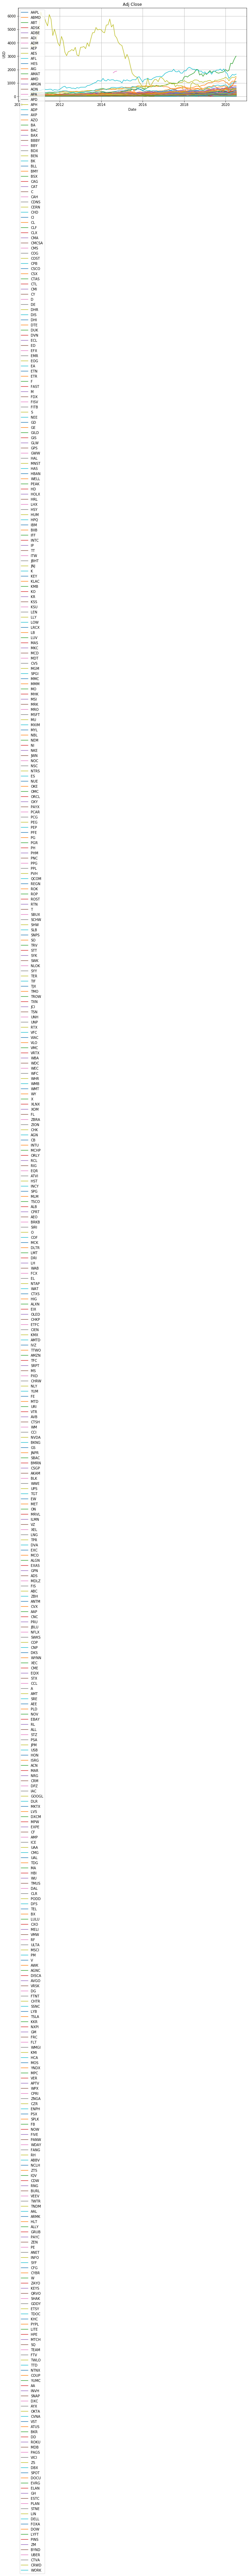

In [15]:
attribute = 'Adj Close'
plt.figure(figsize=(12,5))
for ticker in tickers_list:
    plt.plot(data[ticker][attribute],label=ticker)
    
plt.legend()
plt.title(attribute)
plt.xlabel('Date')
plt.ylabel('USD')
plt.grid()

# To Read from Already Saved

### Single Series

In [35]:
df_aapl = pd.read_csv('historical_data/AAPL_1mo_10y.csv')
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl.set_index('Date', inplace=True)
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,246.500000,294.529999,236.899994,293.799988,293.006836,816222400.0
2020-05-01,286.250000,324.239990,285.850006,317.940002,317.081665,701601300.0
2020-06-01,317.750000,372.380005,317.209991,364.799988,364.799988,810739300.0
2020-07-01,365.119995,378.619995,363.640015,372.690002,372.690002,113918500.0
2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106114.0


### Multiple Series

In [51]:
#tickers_load_list = ['AAPL','AMD','GOOGL','TSLA']

tickers_load_list = tickers_list.copy() # to load data from all tickers

In [52]:
len(tickers_load_list)

500

In [53]:
#data_dir = r'C:\Wits\2020\COMS7060 - Capstone Project\data\Q500US Data\historical_data'
data_dir = 'historical_data'

all_data_files = glob.glob(data_dir + "/*.csv")

ticker_dfs = []
file_tickers_list = []

for filename in all_data_files:
    ticker = filename.split('data\\')[1].split('_1mo')[0]
    # load if ticker is in requested load list
    if ticker in tickers_load_list:
        file_tickers_list.append(ticker)
        df = pd.read_csv(filename, header=0) #    df = pd.read_csv(filename, header=0) 
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        ticker_dfs.append(df)

#pd.concat([df1, df2], axis=1, keys=['ABC', 'XYZ'])
data = pd.concat(ticker_dfs, axis=1, keys=file_tickers_list)
data.head()

AAL                                                    AAPL  \
             Open   High    Low  Close  Adj Close       Volume       Open   
Date                                                                        
2010-07-01    NaN    NaN    NaN    NaN        NaN          NaN        NaN   
2010-08-01  11.00  11.40   8.40   9.04   8.522383  169127000.0  37.205715   
2010-09-01   9.33  10.17   8.51   9.25   8.720360  129319900.0  35.352856   
2010-10-01   9.29  12.24   8.94  11.79  11.114922  140380600.0  40.878571   
2010-11-01  11.88  12.26  10.51  11.16  10.520993  105905700.0  43.174286   

                                             ...  ZS                         \
                 High        Low      Close  ... Low Close Adj Close Volume   
Date                                         ...                              
2010-07-01        NaN        NaN        NaN  ... NaN   NaN       NaN    NaN   
2010-08-01  37.754284  33.651428  34.728573  ... NaN   NaN       NaN    NaN   
2010-09-01  42.104286  35.182858  40.535713  ... NaN   NaN       NaN    NaN   
2010-10-01  45.571430  39.681427  42.997143  ... NaN   NaN       NaN    NaN   
2010-11-01  45.900002  42.537144  44.450001  ... NaN   NaN       NaN    NaN   

                 ZTS                             
           Adj Close Close High Low Open Volume  
Date                                             
2010-07-01       NaN   NaN  NaN NaN  NaN    NaN  
2010-08-01       NaN   NaN  NaN NaN  NaN    NaN  
2010-09-01       NaN   NaN  NaN NaN  NaN    NaN  
2010-10-01       NaN   NaN  NaN NaN  NaN    NaN  
2010-11-01       NaN   NaN  NaN NaN  NaN    NaN  

[5 rows x 3000 columns]

# Remove Series with Too Many NaN Values or Oulier Close Price Values

In [54]:
#set thresholds
nb_nan_thresh = 10 # max amount of nan values
max_adj_close = 3500 # max adj close price

# create mask where threshold is exceeded
#mask = [data[(t,'Adj Close')].isna().sum() > nb_nan_thresh for t in tickers_load_list]
mask = [(data[(t,'Adj Close')].isna().sum() > nb_nan_thresh) | (data[(t,'Adj Close')].max() > max_adj_close) for t in tickers_load_list]

# list of tickers that exceed threshold
violation_ticker_list = [tickers_load_list[i] for i in range(len(tickers_load_list)) if mask[i]]
violation_ticker_list

# remove tickers that violate criteria
if violation_ticker_list:
    data = data.drop(violation_ticker_list,axis=1)   
    print('the following tickers had more than {:d} NaN values and were dropped:'.format(nb_nan_thresh))
    print(violation_ticker_list)
else:
    print('no tickers were dropped.')
print()
    
# fill in remaining NaN values by linear interpolation
max_na_before = max(data.isna().sum())
data = data.interpolate(method='linear', axis=0)
max_na_after = max(data.isna().sum())
print('Interpolation finished. Max NaN values reduced from {:d} to {:d}'.format(max_na_before, max_na_after))

# update icker list
for tick in violation_ticker_list:
    tickers_load_list.remove(tick)

print()
print('number of series remaining:',len(tickers_load_list))

the following tickers had more than 10 NaN values and were dropped:
['TT', 'NLOK', 'VIAC', 'CHK', 'BRKB', 'IAC', 'MPC', 'VER', 'APTV', 'WPX', 'CPRI', 'ZNGA', 'CZR', 'ENPH', 'PSX', 'SPLK', 'FB', 'NOW', 'FIVE', 'PANW', 'WDAY', 'FANG', 'RH', 'ABBV', 'NCLH', 'ZTS', 'IQV', 'CDW', 'RNG', 'BURL', 'VEEV', 'TWTR', 'TNDM', 'ARMK', 'HLT', 'ALLY', 'GRUB', 'PAYC', 'ZEN', 'PE', 'ANET', 'INFO', 'SYF', 'CFG', 'CYBR', 'W', 'ZAYO', 'KEYS', 'QRVO', 'SHAK', 'GDDY', 'ETSY', 'TDOC', 'KHC', 'PYPL', 'LITE', 'HPE', 'MTCH', 'SQ', 'TEAM', 'FTV', 'TWLO', 'TTD', 'NTNX', 'COUP', 'YUMC', 'INVH', 'SNAP', 'AYX', 'OKTA', 'CVNA', 'VST', 'ATUS', 'ROKU', 'MDB', 'PAGS', 'VICI', 'ZS', 'DBX', 'SPOT', 'DOCU', 'ELAN', 'GH', 'ESTC', 'PLAN', 'STNE', 'DELL', 'FOXA', 'DOW', 'LYFT', 'PINS', 'ZM', 'BYND', 'UBER', 'CTVA', 'CRWD', 'WORK']

Interpolation finished. Max NaN values reduced from 10 to 10

number of series remaining: 403


In [49]:
data.tail()

AAL                                                   \
             Open       High    Low  Close Adj Close        Volume   
Date                                                                 
2020-04-01  11.45  13.400000   9.09  12.01     12.01  1.750383e+09   
2020-05-01  11.41  12.550000   8.25  10.50     10.50  1.375172e+09   
2020-06-01  10.79  22.799999  10.62  13.07     13.07  3.102873e+09   
2020-07-01  13.48  14.290000  11.91  11.91     11.91  3.600711e+08   
2020-07-07  12.51  12.537300  11.91  11.91     11.91  7.670781e+07   

                  AAPL                                      ...        ZBRA  \
                  Open        High         Low       Close  ...         Low   
Date                                                        ...               
2020-04-01  246.500000  294.529999  236.899994  293.799988  ...  170.630005   
2020-05-01  286.250000  324.239990  285.850006  317.940002  ...  215.520004   
2020-06-01  317.750000  372.380005  317.209991  364.799988  ...  244.320007   
2020-07-01  365.119995  378.619995  363.640015  372.690002  ...  250.949997   
2020-07-07  375.410004  378.619995  372.230011  372.690002  ...  253.820007   

                                                    ZION             \
                 Close   Adj Close     Volume       Open       High   
Date                                                                  
2020-04-01  229.660004  229.660004  9964900.0  25.870001  32.840000   
2020-05-01  261.320007  261.320007  7641100.0  31.250000  35.310001   
2020-06-01  255.949997  255.949997  7725900.0  33.160000  40.970001   
2020-07-01  254.259995  254.259995  1020000.0  33.930000  34.060001   
2020-07-07  254.259995  254.259995   274438.0  32.380001  32.889999   

                                                         
                  Low      Close  Adj Close      Volume  
Date                                                     
2020-04-01  24.410000  31.610001  31.250317  73844000.0  
2020-05-01  25.070000  32.910000  32.535522  60826500.0  
2020-06-01  32.209999  34.000000  34.000000  57364200.0  
2020-07-01  31.420000  31.540001  31.540001   5993600.0  
2020-07-07  31.420000  31.540001  31.540001   1734434.0  

[5 rows x 2418 columns]

# Save Processed Useable Historical Data to .csv Files

In [50]:
# save data in csv files

#period = "10y"
#interval = "1mo"

for tick in tickers_load_list:
    data[tick].to_csv('useable_historical_data/{:s}_{:s}_{:s}.csv'.format(tick, interval, period))
    print(tick, 'saved.')
print('done.')

AAPL saved.
ABMD saved.
ABT saved.
ADSK saved.
ADBE saved.
ADI saved.
ADM saved.
AEP saved.
AES saved.
AFL saved.
HES saved.
AIG saved.
AMAT saved.
AMD saved.
AMGN saved.
AON saved.
APA saved.
APD saved.
APH saved.
ADP saved.
AXP saved.
AZO saved.
BA saved.
BAC saved.
BAX saved.
BBBY saved.
BBY saved.
BDX saved.
BEN saved.
BK saved.
BLL saved.
BMY saved.
BSX saved.
CAG saved.
CAT saved.
C saved.
CAH saved.
CDNS saved.
CERN saved.
CHD saved.
CI saved.
CL saved.
CLF saved.
CLX saved.
CMA saved.
CMCSA saved.
CMS saved.
COG saved.
COST saved.
CPB saved.
CSCO saved.
CSX saved.
CTAS saved.
CTL saved.
CMI saved.
CY saved.
D saved.
DE saved.
DHR saved.
DIS saved.
DHI saved.
DTE saved.
DUK saved.
DVN saved.
ECL saved.
ED saved.
EFX saved.
EMR saved.
EOG saved.
EA saved.
ETN saved.
ETR saved.
F saved.
FAST saved.
M saved.
FDX saved.
FISV saved.
FITB saved.
S saved.
NEE saved.
GD saved.
GE saved.
GILD saved.
GIS saved.
GLW saved.
GPS saved.
GWW saved.
HAL saved.
MNST saved.
HAS saved.
HBAN saved.

# Plot Processed Data

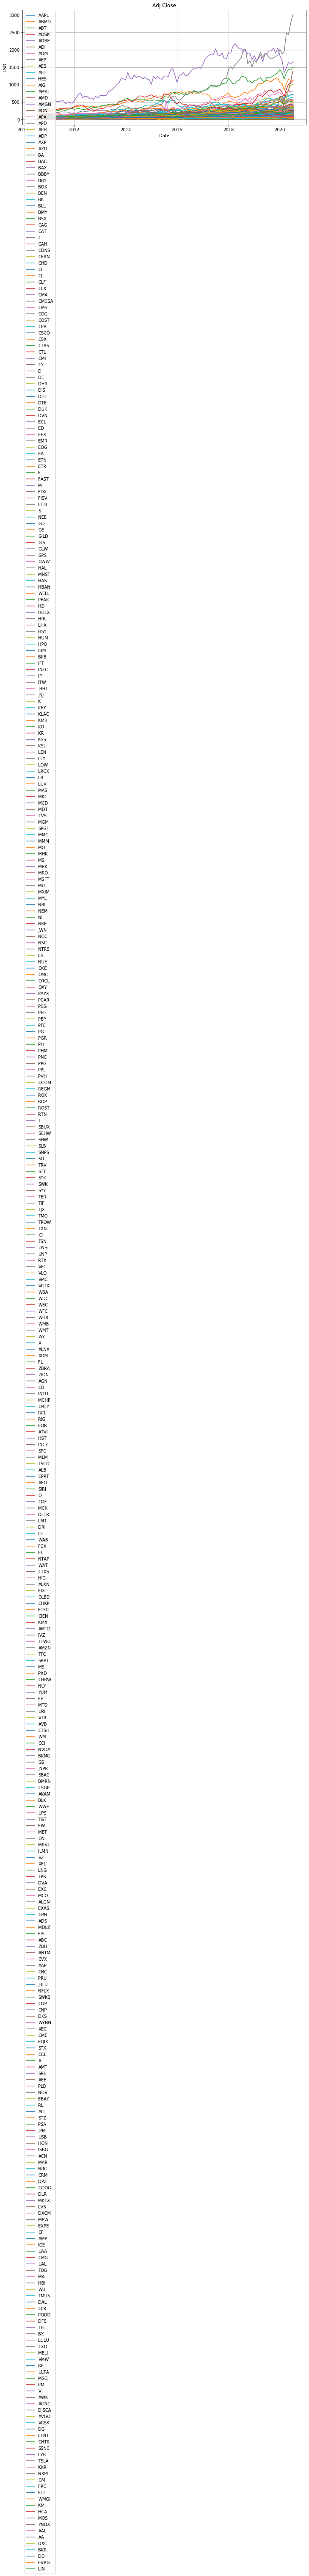

In [55]:
attribute = 'Adj Close'
plt.figure(figsize=(12,5))
for ticker in tickers_load_list:
    plt.plot(data[ticker][attribute],label=ticker)
    
plt.legend()
plt.title(attribute)
plt.xlabel('Date')
plt.ylabel('USD')
plt.grid()

# Note on Series with Many NaN Values

In [29]:
# turns out that it was GM, FRC, KMI, WMGI, YNDX that had many NaN values.
# They could not be interpolated since they were all in the beginning of the series.
na_counts = [data[(t,'Adj Close')].isna().sum() for t in tickers_load_list]
tick = tickers_load_list[na_counts.index(10)]
print(tick)
data[tick].head(15)

YNDX


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN
